# Importing required libraries
# We use pandas for data manipulation and matplotlib for visualization

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract – Load the Garmin running data
# Reading the original raw CSV file

In [10]:
df_raw = pd.read_csv("Garmin_run_data.csv")

# Transform – Cleaning and enhancing the data

In [11]:
import pandas as pd

# ============================
# 📥 Load raw data
# ============================
df_raw = pd.read_csv("Garmin_run_data.csv")

# ============================
# 🧹 Data Cleaning
# ============================

# 1. Remove duplicate rows
df_cleaned = df_raw.drop_duplicates()

# 2. Standardize column names (lowercase, underscores)
df_cleaned.columns = [col.strip().lower().replace(" ", "_") for col in df_cleaned.columns]

# 3. Convert timestamps to datetime
if 'timestamp' in df_cleaned.columns:
    df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'], errors='coerce')

# 4. Fill missing numeric values with column means
numeric_cols = df_cleaned.select_dtypes(include='number').columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].mean())

# 5. Remove outliers in heart_rate (keep values between 30 and 220 bpm)
if 'heart_rate' in df_cleaned.columns:
    df_cleaned = df_cleaned[(df_cleaned['heart_rate'] >= 30) & (df_cleaned['heart_rate'] <= 220)]

# 6. Unit conversion: meters to kilometers
if 'distance' in df_cleaned.columns:
    df_cleaned['distance_km'] = df_cleaned['distance'] / 1000

# 7. Unit conversion: speed from m/s to km/h
if 'speed' in df_cleaned.columns:
    df_cleaned['speed_kmh'] = df_cleaned['speed'] * 3.6

# ============================
# 📊 Data Aggregation (Weekly Stats)
# ============================

if 'timestamp' in df_cleaned.columns:
    # Extract week, month, year for grouping
    df_cleaned['week'] = df_cleaned['timestamp'].dt.isocalendar().week
    df_cleaned['month'] = df_cleaned['timestamp'].dt.month
    df_cleaned['year'] = df_cleaned['timestamp'].dt.year

    # Group by year + week to compute stats
    weekly_stats = df_cleaned.groupby(['year', 'week']).agg(
        total_runs=('timestamp', 'count'),
        total_distance_km=('distance_km', 'sum'),
        average_speed_kmh=('speed_kmh', 'mean')
    ).reset_index()

    # Calculate average pace (min/km) if speed exists
    if 'average_speed_kmh' in weekly_stats.columns:
        weekly_stats['average_pace_min_per_km'] = 60 / weekly_stats['average_speed_kmh']

# ============================
# 💾 Save outputs
# ============================

# Save cleaned data
df_cleaned.to_csv("cleaned_garmin_run_data.csv", index=False)

# Save weekly statistics (if generated)
if 'weekly_stats' in locals():
    weekly_stats.to_csv("weekly_stats_garmin_run_data.csv", index=False)

print("✅ Cleaned data and weekly stats saved.")


✅ Cleaned data and weekly stats saved.


# Visualize – Ploting distributions for insight

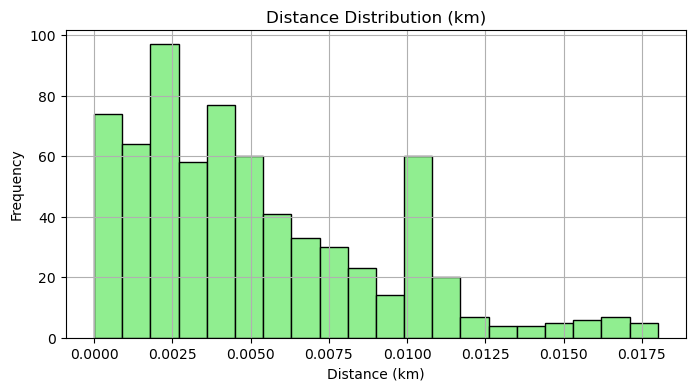

In [12]:
# Plot heart rate distribution
if 'heart_rate' in df_cleaned.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df_cleaned['heart_rate'], bins=30, color='skyblue', edgecolor='black')
    plt.title("Heart Rate Distribution")
    plt.xlabel("Heart Rate (bpm)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Plot distance (km) if available
if 'distance_km' in df_cleaned.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df_cleaned['distance_km'], bins=20, color='lightgreen', edgecolor='black')
    plt.title("Distance Distribution (km)")
    plt.xlabel("Distance (km)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


# Load – Saved the cleaned dataset to a new CSV

In [13]:
df_cleaned.to_csv("cleaned_garmin_run_data.csv", index=False)
print("✅ Cleaned data saved to 'cleaned_garmin_run_data.csv'")


✅ Cleaned data saved to 'cleaned_garmin_run_data.csv'
